Importing Relevant Libraries

In [13]:
import csv
import random
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import data_file_reader
from sklearn.decomposition import FastICA
from sklearn.datasets import load_digits
from tabulate import tabulate
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

Calling File reader and splitting train and test set from the overall data

In [8]:
filename='features_train.csv'
data,features,labels=data_file_reader.file_reader(filename,'train')
train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(features, labels, test_size=0.2, random_state=10)

Defining the classifiers to be used

In [3]:
svc=SVC(kernel='linear', C=1)
rf=RandomForestClassifier(n_estimators=50, random_state=1)
knn=KNeighborsClassifier(n_neighbors=3)
mv=VotingClassifier(estimators=[('rf', rf),('knn',knn),('svc',svc)], voting='hard')
num_folds=10

Performing cross validation on the classfiers to gauge performance

In [22]:

cv_scores_svc=cross_val_score(svc, features,np.ravel(labels), cv=num_folds)
accur_crossval_svc=cv_scores_svc.mean()*100
std_crossval_svc=cv_scores_svc.std()*200
print('The Accuracy of the Support Vector Machine Classifier with 10-fold Cross Validation is : %f'%accur_crossval_svc+'%'+' (+/- %0.2f)'%std_crossval_svc)

cv_scores_rf=cross_val_score(rf, features,np.ravel(labels), cv=num_folds)
accur_crossval_rf=cv_scores_rf.mean()*100
std_crossval_rf=cv_scores_rf.std()*200
print('The Accuracy of the Random Forest Classifier with 10-fold Cross Validation is : %f'%accur_crossval_rf+'%'+' (+/- %0.2f)'%std_crossval_rf)

cv_scores_knn=cross_val_score(knn, features,np.ravel(labels), cv=num_folds)
accur_crossval_knn=cv_scores_knn.mean()*100
std_crossval_knn=cv_scores_knn.std()*200
print('The Accuracy of the K-Nearest Neighbour Classifier with 10-fold Cross Validation is : %f'%accur_crossval_knn+'%'+' (+/- %0.2f)'%std_crossval_knn)

cv_scores_mv=cross_val_score(mv, features,np.ravel(labels), cv=num_folds)
accur_crossval_mv=cv_scores_mv.mean()*100
std_crossval_mv=cv_scores_mv.std()*200
print('The Accuracy of the Majority Voting Classifier with 10-fold Cross Validation is : %f'%accur_crossval_mv+'%'+' (+/- %0.2f)'%std_crossval_mv)



The Accuracy of the Support Vector Machine Classifier with 10-fold Cross Validation is : 80.250000% (+/- 7.89)
The Accuracy of the Random Forest Classifier with 10-fold Cross Validation is : 84.500000% (+/- 11.36)
The Accuracy of the K-Nearest Neighbour Classifier with 10-fold Cross Validation is : 83.250000% (+/- 11.63)
The Accuracy of the Majority Voting Classifier with 10-fold Cross Validation is : 86.250000% (+/- 8.14)


Following are two procedures to perform PCA and LDA on the data to perform feature reduction. 

In [23]:
# Scale the input data (Good Practice when performing PCA)
sc=StandardScaler()
train_set=sc.fit_transform(features)
#test_set=sc.fit_transform(test_data_features)

#Perform PCA on the input data reducing the input from 4 dimensions to 2 dimensions
pca=PCA(n_components=80)
pca_train_set= pca.fit_transform(train_set) 
#pca_test_set=pca.fit_transform(test_set)
print(pca.explained_variance_ratio_)  

[9.04820614e-01 4.20131350e-02 1.72442317e-02 1.28639860e-02
 6.38265627e-03 4.25028515e-03 2.18320298e-03 1.68602823e-03
 1.30826545e-03 1.07071118e-03 9.36918946e-04 8.29274936e-04
 6.97499650e-04 4.35891622e-04 3.80684682e-04 3.12884174e-04
 2.88769329e-04 2.33481355e-04 2.06699702e-04 1.82689585e-04
 1.61362225e-04 1.51530862e-04 1.19724737e-04 1.16818126e-04
 1.10760614e-04 9.00461190e-05 8.00065405e-05 7.61983151e-05
 6.86210887e-05 6.61878387e-05 5.61016875e-05 5.00834098e-05
 4.68963462e-05 4.24682376e-05 3.58925603e-05 3.49929716e-05
 3.27107732e-05 2.77768294e-05 2.66288436e-05 2.50646129e-05
 1.92742645e-05 1.91439422e-05 1.81311971e-05 1.57656447e-05
 1.38938651e-05 1.30119490e-05 1.21692383e-05 1.06308516e-05
 1.02124018e-05 8.23806161e-06 7.91267557e-06 7.36590782e-06
 6.45249382e-06 5.75202473e-06 5.48028565e-06 4.72591863e-06
 4.60441776e-06 4.32500315e-06 4.01948684e-06 3.74068203e-06
 3.38721165e-06 3.21089333e-06 2.96648151e-06 2.64824816e-06
 2.58557564e-06 2.330449

In [24]:
cv_scores_svc_pca=cross_val_score(svc, pca_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_svc_pca=cv_scores_svc_pca.mean()*100
std_crossval_svc_pca=cv_scores_svc_pca.std()*200
print('The Accuracy of the Support Vector Machine Classifier with 10-fold Cross Validation is : %f'%accur_crossval_svc_pca+'%'+' (+/- %0.2f)'%std_crossval_svc_pca)

cv_scores_rf_pca=cross_val_score(rf, pca_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_rf_pca=cv_scores_rf_pca.mean()*100
std_crossval_rf_pca=cv_scores_rf_pca.std()*200
print('The Accuracy of the Random Forest Classifier with 10-fold Cross Validation is : %f'%accur_crossval_rf_pca+'%'+' (+/- %0.2f)'%std_crossval_rf_pca)

cv_scores_knn_pca=cross_val_score(knn, pca_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_knn_pca=cv_scores_knn_pca.mean()*100
std_crossval_knn_pca=cv_scores_knn.std()*200
print('The Accuracy of the K-Nearest Neighbour Classifier with 10-fold Cross Validation is : %f'%accur_crossval_knn_pca+'%'+' (+/- %0.2f)'%std_crossval_knn_pca)

cv_scores_mv_pca=cross_val_score(mv, pca_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_mv_pca=cv_scores_mv_pca.mean()*100
std_crossval_mv_pca=cv_scores_mv_pca.std()*200
print('The Accuracy of the Majority Voting Classifier with 10-fold Cross Validation is : %f'%accur_crossval_mv_pca+'%'+' (+/- %0.2f)'%std_crossval_mv_pca)


The Accuracy of the Support Vector Machine Classifier with 10-fold Cross Validation is : 89.000000% (+/- 6.40)
The Accuracy of the Random Forest Classifier with 10-fold Cross Validation is : 91.750000% (+/- 10.74)
The Accuracy of the K-Nearest Neighbour Classifier with 10-fold Cross Validation is : 83.750000% (+/- 11.63)
The Accuracy of the Majority Voting Classifier with 10-fold Cross Validation is : 91.500000% (+/- 9.54)


In [4]:
lda=LDA(n_components=200)
lda_train_set=lda.fit_transform(features,np.ravel(labels))
#lda_test_set = lda.transform(test_data_features)

cv_scores_svc_lda=cross_val_score(svc, lda_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_svc_lda=cv_scores_svc_lda.mean()*100
std_crossval_svc_lda=cv_scores_svc_lda.std()*2
print('The Accuracy of the Support Vector Machine Classifier +LDA with 10-fold Cross Validation is : %f'%accur_crossval_svc_lda+'%'+' (+/- %0.2f)'%std_crossval_svc_lda)

cv_scores_rf_lda=cross_val_score(rf, lda_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_rf_lda=cv_scores_rf_lda.mean()*100
std_crossval_rf_lda=cv_scores_rf_lda.std()*2
print('The Accuracy of the Random Forest Classifier + LDA with 10-fold Cross Validation is : %f'%accur_crossval_rf_lda+'%'+' (+/- %0.2f)'%std_crossval_rf_lda)

cv_scores_knn_lda=cross_val_score(knn, lda_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_knn_lda=cv_scores_knn_lda.mean()*100
std_crossval_knn_lda=cv_scores_knn_lda.std()*2
print('The Accuracy of the K-Nearest Neighbour Classifier + LDA with 10-fold Cross Validation is : %f'%accur_crossval_knn_lda+'%'+' (+/- %0.2f)'%std_crossval_knn_lda)

cv_scores_mv_lda=cross_val_score(mv, lda_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_mv_lda=cv_scores_mv_lda.mean()*100
std_crossval_mv_lda=cv_scores_mv_lda.std()*2
print('The Accuracy of the Majority Voting Classifier +LDA with 10-fold Cross Validation is : %f'%accur_crossval_mv_lda+'%'+' (+/- %0.2f)'%std_crossval_mv_lda)


/home/simondaniels/anaconda3/envs/my_env_new/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


The Accuracy of the Support Vector Machine Classifier +LDA with 10-fold Cross Validation is : 96.500000% (+/- 0.06)
The Accuracy of the Random Forest Classifier + LDA with 10-fold Cross Validation is : 92.750000% (+/- 0.05)
The Accuracy of the K-Nearest Neighbour Classifier + LDA with 10-fold Cross Validation is : 95.000000% (+/- 0.07)
The Accuracy of the Majority Voting Classifier +LDA with 10-fold Cross Validation is : 95.500000% (+/- 0.05)


In [26]:
ica =  FastICA(n_components=320,random_state=0)
ica_train_set=ica.fit_transform(features,np.ravel(labels))
#ica_test_set = ica.transform(test_data_features)

cv_scores_svc_ica=cross_val_score(svc, ica_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_svc_ica=cv_scores_svc_ica.mean()*100
std_crossval_svc_ica=cv_scores_svc_ica.std()*200
print('The Accuracy of the Support Vector Machine Classifier + ICA with 10-fold Cross Validation is : %f'%accur_crossval_svc_ica+'%'+' (+/- %0.2f)'%std_crossval_svc_ica)

cv_scores_rf_ica=cross_val_score(rf, ica_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_rf_ica=cv_scores_rf_ica.mean()*100
std_crossval_rf_ica=cv_scores_rf_ica.std()*200
print('The Accuracy of the Random Forest Classifier + ICA with 10-fold Cross Validation is : %f'%accur_crossval_rf_ica+'%'+' (+/- %0.2f)'%std_crossval_rf_ica)

cv_scores_knn_ica=cross_val_score(knn, ica_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_knn_ica=cv_scores_knn_ica.mean()*100
std_crossval_knn_ica=cv_scores_knn_ica.std()*200
print('The Accuracy of the K-Nearest Neighbour Classifier + ICA with 10-fold Cross Validation is : %f'%accur_crossval_knn_ica+'%'+' (+/- %0.2f)'%std_crossval_knn_ica)

cv_scores_mv_ica=cross_val_score(mv, ica_train_set,np.ravel(labels), cv=num_folds)
accur_crossval_mv_ica=cv_scores_mv_ica.mean()*100
std_crossval_mv_ica=cv_scores_mv_ica.std()*200
print('The Accuracy of the Majority Voting Classifier + ICA with 10-fold Cross Validation is : %f'%accur_crossval_mv_ica+'%'+' (+/- %0.2f)'%std_crossval_mv_ica)



/home/simondaniels/anaconda3/envs/my_env_new/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


The Accuracy of the Support Vector Machine Classifier + ICA with 10-fold Cross Validation is : 82.000000% (+/- 12.61)
The Accuracy of the Random Forest Classifier + ICA with 10-fold Cross Validation is : 80.750000% (+/- 12.66)
The Accuracy of the K-Nearest Neighbour Classifier + ICA with 10-fold Cross Validation is : 73.250000% (+/- 13.97)
The Accuracy of the Majority Voting Classifier + ICA with 10-fold Cross Validation is : 80.250000% (+/- 12.34)


In [28]:
classifiers=[' ', 'Support Vector Machine','Random Forest','K-Nearest Neighbour','Majority Voting']
feature_reducers=np.asarray(['No Feature Reduction','PCA','LDA','ICA'])
accuracy_values=[(classifiers),(feature_reducers[0],accur_crossval_svc,accur_crossval_rf,accur_crossval_knn,accur_crossval_mv),(feature_reducers[1],accur_crossval_svc_pca,accur_crossval_rf_pca,accur_crossval_knn_pca,accur_crossval_mv_pca),(feature_reducers[2],accur_crossval_svc_lda,accur_crossval_rf_lda,accur_crossval_knn_lda,accur_crossval_mv_lda),(feature_reducers[3],accur_crossval_svc_ica,accur_crossval_rf_ica,accur_crossval_knn_ica,accur_crossval_mv_ica)]
print(tabulate(accuracy_values))
#print(accuracy_values)

--------------------  ----------------------  -----------------  -------------------  -----------------
                      Support Vector Machine  Random Forest      K-Nearest Neighbour  Majority Voting
No Feature Reduction  80.24999999999999       84.5               83.25000000000001    86.25
PCA                   89.0                    91.74999999999999  83.75                91.5
LDA                   96.49999999999999       93.24999999999999  95.49999999999999    95.49999999999999
ICA                   82.0                    80.74999999999999  73.25000000000001    80.25
--------------------  ----------------------  -----------------  -------------------  -----------------


Sea_Beach_Background.jpg


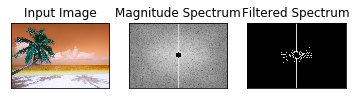

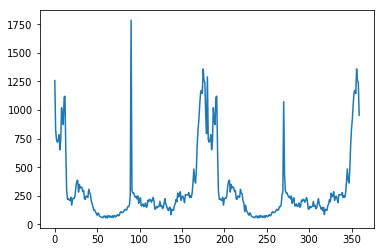

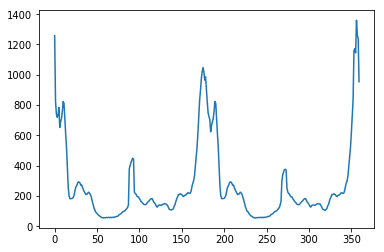

In [23]:
import feature_extractor
feature_extractor.extract_features_prediction('Sea_Beach_Background.jpg')
filename='features_test.csv'
data,predict_features,_=data_file_reader.file_reader(filename,'test')

In [24]:
lda_test_set = lda.transform(predict_features)
clf=mv.fit(lda_train_set,np.ravel(labels))
prediction=clf.predict(lda_test_set)
print(prediction)

[0.]


In [9]:
########################################################################################################################
# Function Name: plot_confusion_matrix
# Function Inputs : cm,classes,normalize,title, cmap
# Returns: ax
# Description: This function takes in a confusion matrix and plots it out in a matplot axis. This function is used as a 
#              helper to make a nice graphical representation of the confusion matrix. This function was obtained from 
#              https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#########################################################################################################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = cm
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/home/simondaniels/anaconda3/envs/my_env_new/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Confusion matrix, without normalization
[[33  5]
 [15 27]]
The Decision Tree Classifier Accuracy with LDA is: 75.000000%
The Decision Tree Classifier Predicted Precision is: 76.562500%


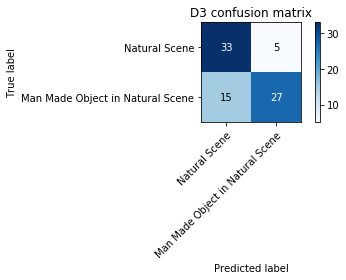

In [14]:
lda=LDA(n_components=200)
lda_train_set_cm=lda.fit_transform(train_data_features,np.ravel(train_data_labels))
lda_test_set_cm = lda.transform(test_data_features)

classes=['Natural Scene','Man Made Object in Natural Scene']
clf_cm=mv.fit(lda_train_set_cm,np.ravel(train_data_labels))
prediction_cm=clf_cm.predict(lda_test_set_cm)
cmat_mv=confusion_matrix(test_data_labels,prediction_cm)
plot_confusion_matrix(cmat_mv, classes=classes, title='D3 confusion matrix')
plt.savefig('MV confusion matrix.png')

#Evaluate performance of the Classifer with LDA
mv_lda_score=accuracy_score(test_data_labels,prediction_cm)
print('The Decision Tree Classifier Accuracy with LDA is: %f'%(mv_lda_score*100)+'%')




In [18]:
TP = cmat_mv[0,0]
TN = cmat_mv[1,1]
FP = cmat_mv[1,0]
FN = cmat_mv[0,1]


Predicted_precision_mv_lda=precision_score(test_data_labels, prediction_cm, average='macro')
print('The Majority Voting Classifier with LDA Predicted Precision is: %f'%(Predicted_precision_mv_lda*100)+'%')

sensitivity=(TP/(TP+FN))
specificity=(TN/(TN+FP))
print('The Majority Voting Classifier with LDA Predicted Sensitivity is: %f'%(sensitivity*100)+'%')
print('The Majority Voting Classifier with LDA Predicted Specificity is: %f'%(specificity*100)+'%')


The Majority Voting Classifier with LDA Predicted Precision is: 76.562500%
The Majority Voting Classifier with LDA Predicted Sensitivity is: 86.842105%
The Majority Voting Classifier with LDA Predicted Specificity is: 64.285714%
